# **Assignment : Anime Recommended System**

- 62010278 ณัฐพนธ์ สุขถาวร 
- 62010497 นิธิ น้อมประวัติ 
- 62010609 พักตร์ภูมิ ตาแพร่ 
- 62010948 สิรวิชญ์ สุขวัฒนาวิทย์ 

## **Import Libraries**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


## **Global Config**

In [2]:
sns.set_theme(style="whitegrid", palette="pastel")


class CONFIG:
    PLT_FIG_SIZE = plt.figaspect(8/19)


# color codes for python build-in print function
class PRINT_COLOR_CODE:
    BLUE = '\033[94m'
    CYAN = '\033[96m'
    GREEN = '\033[92m'
    WARNING = '\033[93m'
    FAIL = '\033[91m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    ENDC = '\033[0m'


## **Define Util Functions**

In [3]:
# function to return list of columns which contained Nan value
def get_cols_contained_na(df):
    masked_na_df = df.isna()
    cols_with_na = df.columns[masked_na_df.any()].tolist()
    return cols_with_na


## **Import Datasets**

In [4]:
ANIME_CSV_PATH = "../datasets/anime.csv"
RATING_CSV_PATH = "../datasets/rating.csv"


In [5]:
anime_df = pd.read_csv(ANIME_CSV_PATH)
anime_df.rename(columns={'rating': 'average_rating'}, inplace=True)

rating_df = pd.read_csv(RATING_CSV_PATH)
rating_df.rename(columns={'rating': 'user_rating'}, inplace=True)

rating_merged_df = rating_df.merge(anime_df, on='anime_id', how='inner')

# NOTE : Careful of big file size
# rating_merged_df.to_csv('./dataExplores/rating_merged_anime.csv', index=False,  encoding='utf-8')


## **Data Exploration (1)**

### 1. **Anime Dataframe** Basic Info.

In [6]:
print(f'\n{PRINT_COLOR_CODE.FAIL}List of columns that contain NaN values : {PRINT_COLOR_CODE.WARNING}{get_cols_contained_na(anime_df)}{PRINT_COLOR_CODE.ENDC}')

anime_df



List of columns that contain NaN values : ['genre', 'type', 'average_rating']


,anime_id,name,genre,type,episodes,average_rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


,anime_id,average_rating,members
count,12294.0,12064.0,12294.0
mean,14058.2,6.5,18071.3
std,11455.3,1.0,54820.7
min,1.0,1.7,5.0
25%,3484.2,5.9,225.0
50%,10260.5,6.6,1550.0
75%,24794.5,7.2,9437.0
max,34527.0,10.0,1013917.0


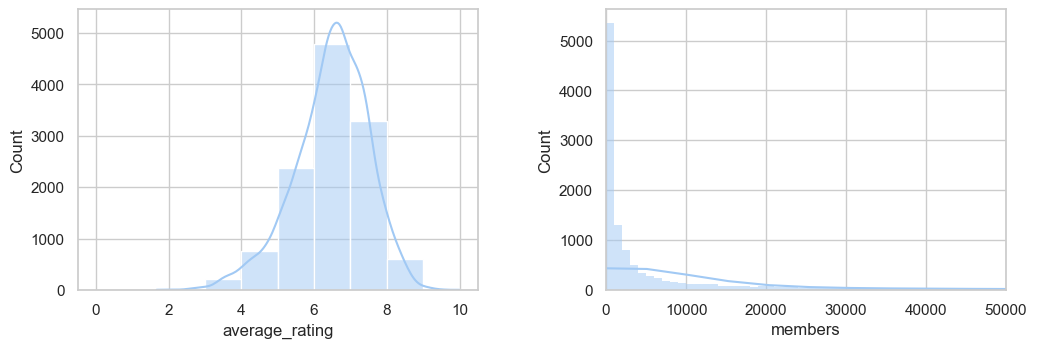

In [7]:
fig, axs = plt.subplots(ncols=2, figsize=CONFIG.PLT_FIG_SIZE)
fig.tight_layout(pad=5.0)

sns.histplot(anime_df, x='average_rating', kde=True, binwidth=1, binrange=[0, 10], ax=axs[0])
sns.histplot(anime_df, x='members', kde=True, binwidth=1e3, ax=axs[1])
plt.xlim(0, 0.05e6)

anime_df.describe().apply(lambda s: s.apply('{0:.1f}'.format))


### 2. **Rating Dataframe** Basic info.

In [8]:
print(f'\n{PRINT_COLOR_CODE.FAIL}List of columns that contain NaN values : {PRINT_COLOR_CODE.WARNING}{get_cols_contained_na(rating_df)}{PRINT_COLOR_CODE.ENDC}')

rating_df



List of columns that contain NaN values : []


,user_id,anime_id,user_rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1
...,...,...,...
7813732,73515,16512,7
7813733,73515,17187,9
7813734,73515,22145,10
7813735,73516,790,9


,user_id,anime_id,user_rating
count,7813737.0,7813737.0,7813737.0
mean,36728.0,8909.1,6.1
std,20997.9,8883.9,3.7
min,1.0,1.0,-1.0
25%,18974.0,1240.0,6.0
50%,36791.0,6213.0,7.0
75%,54757.0,14093.0,9.0
max,73516.0,34519.0,10.0


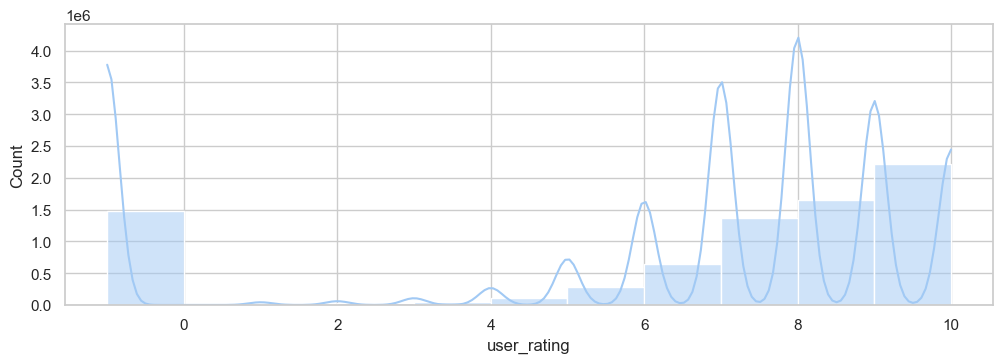

In [9]:
fig, axs = plt.subplots(ncols=1, figsize=CONFIG.PLT_FIG_SIZE)
fig.tight_layout(pad=5.0)

sns.histplot(rating_df, x='user_rating', kde=True, binwidth=1, binrange=[-1, 10], ax=axs)

rating_df.describe().apply(lambda s: s.apply('{0:.1f}'.format))

### 3. **Rating Merged Dataframe** Basic info.

In [10]:
print(f'\n{PRINT_COLOR_CODE.FAIL}List of columns that contain NaN values : {PRINT_COLOR_CODE.WARNING}{get_cols_contained_na(rating_merged_df)}{PRINT_COLOR_CODE.ENDC}')

rating_merged_df



List of columns that contain NaN values : ['genre', 'type', 'average_rating']


,user_id,anime_id,user_rating,name,genre,type,episodes,average_rating,members
0,1,20,-1,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
1,3,20,8,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
2,5,20,6,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
3,6,20,-1,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
4,10,20,-1,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
...,...,...,...,...,...,...,...,...,...
7813722,65682,30450,8,Dr. Slump: Hoyoyo! Arale no Himitsu Dai Koukai...,"Comedy, Sci-Fi, Shounen",Special,1,6.17,248
7813723,69497,33484,10,Shiroi Zou,"Action, Historical, Kids",Movie,1,4.71,45
7813724,70463,29481,-1,Kakinoki Mokkii,"Fantasy, Kids",Special,1,4.33,61
7813725,72404,34412,-1,Hashiri Hajimeta bakari no Kimi ni,Music,Music,1,6.76,239


,user_id,anime_id,user_rating,average_rating,members
count,7813727.0,7813727.0,7813727.0,7813721.0,7813727.0
mean,36728.0,8909.0,6.1,7.7,178620.8
std,20998.0,8883.9,3.7,0.7,188176.4
min,1.0,1.0,-1.0,1.7,29.0
25%,18974.0,1240.0,6.0,7.3,44030.0
50%,36791.0,6213.0,7.0,7.7,110470.0
75%,54757.0,14093.0,9.0,8.1,244268.0
max,73516.0,34519.0,10.0,9.5,1013917.0


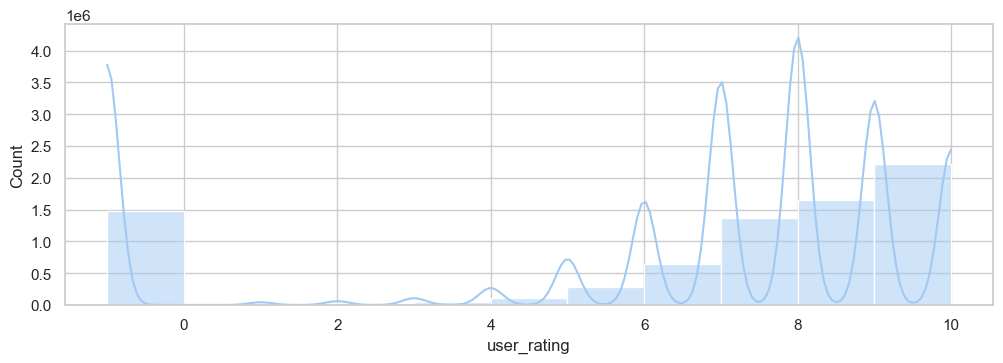

In [11]:
fig, axs = plt.subplots(ncols=1, figsize=CONFIG.PLT_FIG_SIZE)
fig.tight_layout(pad=5.0)

sns.histplot(rating_merged_df, x='user_rating', kde=True, binwidth=1, binrange=[-1, 10], ax=axs)

rating_merged_df.describe().apply(lambda s: s.apply('{0:.1f}'.format))


In [12]:
rating_merged_df.groupby(by='type').count().sort_values(by='user_id', ascending=False).rename(columns={'user_id': 'count'})[['count']]


,count
type,
TV,5283596
Movie,1051998
OVA,800307
Special,559366
ONA,91956
Music,26500


## **Data Cleansing (1)**

In Anime DataFrame, drop all anime types except `TV`, `Movie`, `OVA`, `Special`, `ONA`, `Music`

In [13]:
type_except_list = ["TV", 'Movie', "OVA", "Special", "ONA", "Music"] # FIXME : TUNING ME!!!

print(f"{PRINT_COLOR_CODE.FAIL}drop all anime types except {PRINT_COLOR_CODE.GREEN}{type_except_list}{PRINT_COLOR_CODE.ENDC}")

new_anime_df = anime_df[anime_df['type'].isin(type_except_list)]

drop_count = len(anime_df)-len(new_anime_df)
drop_percentage = (drop_count/len(anime_df))*100

print(f"{PRINT_COLOR_CODE.FAIL}drop {PRINT_COLOR_CODE.WARNING}{drop_count}{PRINT_COLOR_CODE.ENDC} {PRINT_COLOR_CODE.FAIL}rows{PRINT_COLOR_CODE.ENDC} ({drop_percentage:.4f}%)")

anime_df = new_anime_df

anime_df.reset_index(drop=True, inplace=True)
anime_df


drop all anime types except ['TV', 'Movie', 'OVA', 'Special', 'ONA', 'Music']
drop 25 rows (0.2034%)


,anime_id,name,genre,type,episodes,average_rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12264,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12265,5543,Under World,Hentai,OVA,1,4.28,183
12266,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12267,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


In Anime DataFrame, drop less than `{{min_n_members_threshold}}` members anime

In [14]:
min_n_members_threshold = 225  # FIXME : TUNING ME!!!

print(f"{PRINT_COLOR_CODE.FAIL}drop less than {PRINT_COLOR_CODE.WARNING}{min_n_members_threshold}{PRINT_COLOR_CODE.ENDC} {PRINT_COLOR_CODE.FAIL}members anime{PRINT_COLOR_CODE.ENDC}")

new_anime_df = anime_df[anime_df['members'] >= min_n_members_threshold]

drop_count = len(anime_df)-len(new_anime_df)
drop_percentage = (drop_count/len(anime_df))*100

print(f"{PRINT_COLOR_CODE.FAIL}drop {PRINT_COLOR_CODE.WARNING}{drop_count}{PRINT_COLOR_CODE.ENDC} {PRINT_COLOR_CODE.FAIL}rows{PRINT_COLOR_CODE.ENDC} ({drop_percentage:.4f}%)")

anime_df = new_anime_df

anime_df.reset_index(drop=True, inplace=True)
anime_df


drop less than 225 members anime
drop 3068 rows (25.0061%)


,anime_id,name,genre,type,episodes,average_rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
9196,7914,Kyuukyoku no Chef wa Oishinbo Papa,Hentai,OVA,1,5.43,262
9197,5559,Nijuusou: Wana ni Ochita Onna-tachi,Hentai,OVA,1,5.20,240
9198,34492,Nuki Doki! Tenshi to Akuma no Sakusei Battle -...,Hentai,OVA,Unknown,NaN,392
9199,34312,Saimin Class,Hentai,OVA,Unknown,NaN,240


join (inner) Rating Dataframe with Anime Dataframe `again`

In [15]:
rating_merged_df = rating_df.merge(anime_df, on='anime_id', how='inner')

rating_merged_df

,user_id,anime_id,user_rating,name,genre,type,episodes,average_rating,members
0,1,20,-1,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
1,3,20,8,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
2,5,20,6,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
3,6,20,-1,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
4,10,20,-1,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
...,...,...,...,...,...,...,...,...,...
7809105,53492,32251,5,Mirai e no Kakehashi: Bridge for Future,Slice of Life,ONA,6,5.18,282
7809106,59537,33454,7,Kochira Katsushikaku Kameari Kouenmae Hashutsu...,"Comedy, Police, Shounen, Slice of Life",Special,1,7.77,268
7809107,63076,26123,7,Seitokai Yakuindomo* OVA,"Comedy, School, Shounen, Slice of Life",OVA,6,8.05,26361
7809108,65682,30450,8,Dr. Slump: Hoyoyo! Arale no Himitsu Dai Koukai...,"Comedy, Sci-Fi, Shounen",Special,1,6.17,248


## **Data Exploration (2)**

### 1. **Rating Merged Dataframe** Basic Info.

In [16]:
print(f'\n{PRINT_COLOR_CODE.FAIL}List of columns that contain NaN values : {PRINT_COLOR_CODE.WARNING}{get_cols_contained_na(rating_merged_df)}{PRINT_COLOR_CODE.ENDC}')

rating_merged_df


List of columns that contain NaN values : ['genre', 'average_rating']


,user_id,anime_id,user_rating,name,genre,type,episodes,average_rating,members
0,1,20,-1,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
1,3,20,8,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
2,5,20,6,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
3,6,20,-1,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
4,10,20,-1,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
...,...,...,...,...,...,...,...,...,...
7809105,53492,32251,5,Mirai e no Kakehashi: Bridge for Future,Slice of Life,ONA,6,5.18,282
7809106,59537,33454,7,Kochira Katsushikaku Kameari Kouenmae Hashutsu...,"Comedy, Police, Shounen, Slice of Life",Special,1,7.77,268
7809107,63076,26123,7,Seitokai Yakuindomo* OVA,"Comedy, School, Shounen, Slice of Life",OVA,6,8.05,26361
7809108,65682,30450,8,Dr. Slump: Hoyoyo! Arale no Himitsu Dai Koukai...,"Comedy, Sci-Fi, Shounen",Special,1,6.17,248


,user_id,anime_id,user_rating,average_rating,members
count,7809110.0,7809110.0,7809110.0,7809108.0,7809110.0
mean,36726.5,8902.9,6.1,7.7,178726.3
std,20999.5,8880.3,3.7,0.7,188182.0
min,1.0,1.0,-1.0,2.0,225.0
25%,18974.0,1240.0,6.0,7.3,44108.0
50%,36774.0,6213.0,7.0,7.7,110748.0
75%,54763.0,14075.0,9.0,8.1,244268.0
max,73516.0,34475.0,10.0,9.4,1013917.0


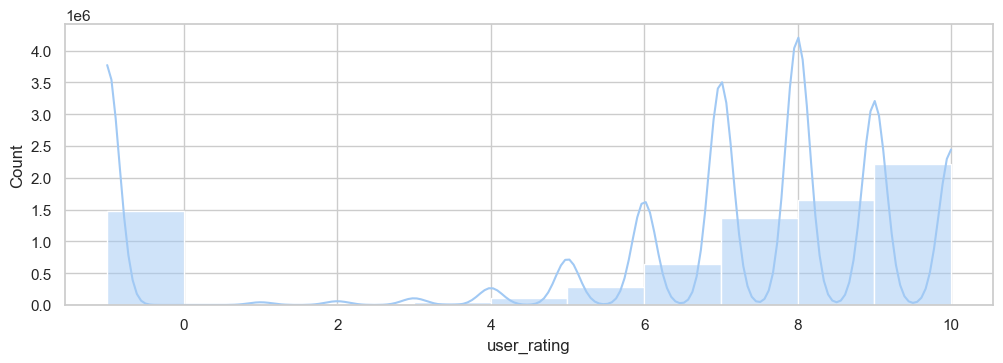

In [17]:
fig, axs = plt.subplots(ncols=1, figsize=CONFIG.PLT_FIG_SIZE)
fig.tight_layout(pad=5.0)

sns.histplot(rating_merged_df, x='user_rating', kde=True, binwidth=1, binrange=[-1, 10], ax=axs)

rating_merged_df.describe().apply(lambda s: s.apply('{0:.1f}'.format))


### 2. Compare **Anime Dataframe** vs **Rating Merged Dataframe**

In [18]:
rating_merged_droped_unrated_user_df = rating_merged_df.drop(rating_merged_df[rating_merged_df['user_rating'] < 0].index)

compare_anime_vs_rating_merged_df = rating_merged_droped_unrated_user_df.groupby(['anime_id']).agg({
    'members': 'mean',
    'user_id': 'count',
    'average_rating': 'mean',
    'user_rating': 'mean',
})
compare_anime_vs_rating_merged_df.rename(
    columns={
        'user_id': 'rating_merged: members (cal)',
        'user_rating': 'rating_merged: average_rating (cal)',
        'members': 'anime: members',
        'average_rating': 'anime: average_rating'
    },
    inplace=True)

print(f'{PRINT_COLOR_CODE.WARNING}Anime Dataframe vs Rating Merged Dataframe (droped users who have not rated anime){PRINT_COLOR_CODE.ENDC}\n')
print(f'{PRINT_COLOR_CODE.CYAN}Anime Dataframe{PRINT_COLOR_CODE.ENDC} contains {PRINT_COLOR_CODE.GREEN}{anime_df.shape[0]}{PRINT_COLOR_CODE.ENDC} unique animes')
print(f'{PRINT_COLOR_CODE.CYAN}Rating Merged Dataframe (droped users who have not rated anime){PRINT_COLOR_CODE.ENDC} contains {PRINT_COLOR_CODE.GREEN}{compare_anime_vs_rating_merged_df.shape[0]}{PRINT_COLOR_CODE.ENDC} unique animes')

compare_anime_vs_rating_merged_df


Anime Dataframe vs Rating Merged Dataframe (droped users who have not rated anime)

Anime Dataframe contains 9201 unique animes
Rating Merged Dataframe (droped users who have not rated anime) contains 8724 unique animes


,anime: members,rating_merged: members (cal),anime: average_rating,rating_merged: average_rating (cal)
anime_id,,,,
1,486824.0,13449,8.82,8.869433
5,137636.0,5790,8.40,8.439724
6,283069.0,9385,8.32,8.419393
7,64905.0,2169,7.36,7.533426
8,9848.0,308,7.06,7.198052
...,...,...,...,...
34324,817.0,11,5.40,5.909091
34325,1454.0,15,7.05,7.333333
34349,1885.0,3,7.25,7.000000


## **Data Cleansing (2)**

In Rating Merged DataFrame, replace all instances of `user_rating` with `average_rating` for rows where user_rating == -1 (unrated anime).

In [19]:
# rating_merged_df['user_rating'] = rating_merged_df.apply(lambda x: x['user_rating'] if x['user_rating'] > -1 else x['average_rating'], axis=1)

# rating_merged_df.reset_index(drop=True, inplace=True)
# rating_merged_df


## **Data Exploration (3)**

### 1. Compare **Anime Dataframe** vs **Rating Merged Dataframe**

In [20]:
# NOTE : SAME RESULT AS ABOVE, IF NO CLEANSING (2)
# rating_merged_replaced_unrated_user_df = rating_merged_df.drop(rating_merged_df[rating_merged_df['user_rating'] < 0].index)

# compare_anime_vs_rating_merged_df = rating_merged_replaced_unrated_user_df.groupby(['anime_id']).agg({
#     'members': 'mean',
#     'user_id': 'count',
#     'average_rating': 'mean',
#     'user_rating': 'mean',
# })
# compare_anime_vs_rating_merged_df.rename(
#     columns={
#         'user_id': 'rating_merged: members (cal)',
#         'user_rating': 'rating_merged: average_rating (cal)',
#         'members': 'anime: members',
#         'average_rating': 'anime: average_rating'
#     },
#     inplace=True)

# print(f'{PRINT_COLOR_CODE.WARNING}Anime Dataframe vs Rating Merged Dataframe (after assigning average rating intead of user rating for users who have not rated anime){PRINT_COLOR_CODE.ENDC}\n')
# print(f'{PRINT_COLOR_CODE.CYAN}Anime Dataframe{PRINT_COLOR_CODE.ENDC} contains {PRINT_COLOR_CODE.GREEN}{anime_df.shape[0]}{PRINT_COLOR_CODE.ENDC} unique animes')
# print(f'{PRINT_COLOR_CODE.CYAN}Rating Merged Dataframe (after assigning average rating intead of user rating for users who have not rated anime){PRINT_COLOR_CODE.ENDC} contains {PRINT_COLOR_CODE.GREEN}{compare_anime_vs_rating_merged_df.shape[0]}{PRINT_COLOR_CODE.ENDC} unique animes')

# compare_anime_vs_rating_merged_df


### 2. **Anime Dataframe** Top 10 Members and Top 10 Average Rating

[Text(0, 0, 'Kimi no Na wa.'),
 Text(1, 0, 'Fullmetal Alchemist: Brotherhood'),
 Text(2, 0, 'Gintama°'),
 Text(3, 0, 'Steins;Gate'),
 Text(4, 0, 'Gintama&#039;'),
 Text(5, 0, 'Haikyuu!!: Karasuno Koukou VS Shiratorizawa Gakuen Koukou'),
 Text(6, 0, 'Hunter x Hunter (2011)'),
 Text(7, 0, 'Ginga Eiyuu Densetsu'),
 Text(8, 0, 'Gintama&#039;: Enchousen'),
 Text(9, 0, 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare')]

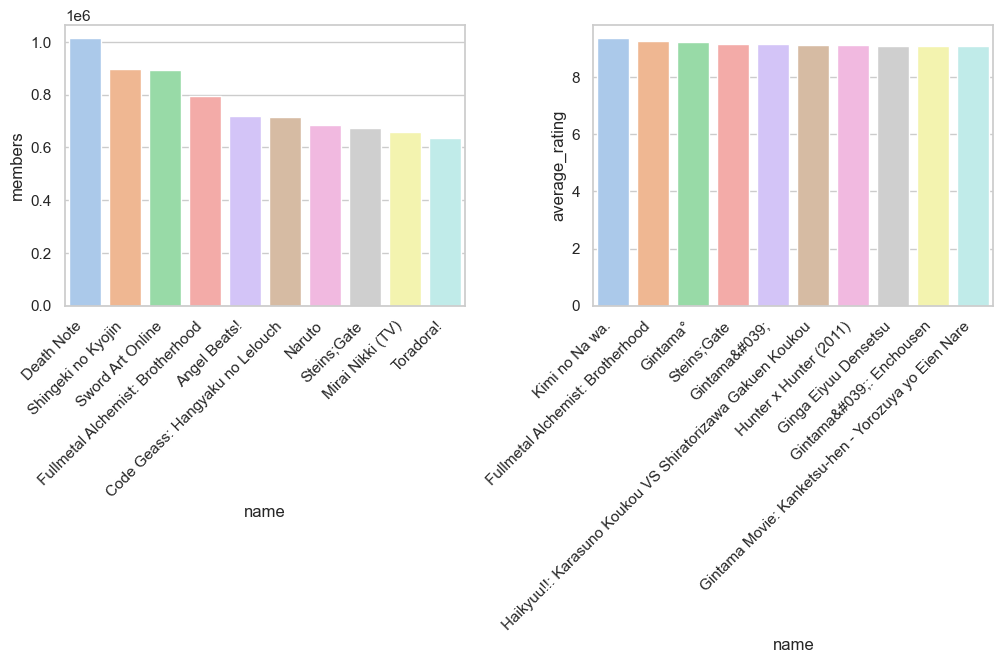

In [21]:
anime_top_10_members_df = anime_df.sort_values(by='members', ascending=False).head(10)
anime_top_10_rating_df = anime_df.sort_values(by='average_rating', ascending=False).head(10)

fig, axs = plt.subplots(ncols=2, figsize=CONFIG.PLT_FIG_SIZE)
fig.tight_layout(pad=5.0)

plt_0 = sns.barplot(data=anime_top_10_members_df, x='name', y='members', ax=axs[0])
plt_0.set_xticklabels(plt_0.get_xticklabels(),rotation=45, horizontalalignment='right')

plt_1 = sns.barplot(data=anime_top_10_rating_df, x='name',y='average_rating',  ax=axs[1])
plt_1.set_xticklabels(plt_1.get_xticklabels(),rotation=45, horizontalalignment='right')


## **Recommended System (Content-based filtering)**

### 1. **Import Libraries**

In [22]:
import nltk


### 2. **Config**

In [23]:
stopwords = nltk.corpus.stopwords.words("english")
nltk.download("stopwords")


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/phukphoom/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### 3. **Define Util Functions**

In [24]:
# function to return list of keywords from the input text
def get_keywords(input_text):
    if input_text is np.NaN:
        return []

    input_text = input_text.lower()

    input_text = ''.join(
        [char for char in input_text if char.isalpha() or char.isspace()])

    return [ele for ele in input_text.split() if ele not in stopwords]


# funtions to return the jaccard similarity between two lists
def jaccard_similarity(x, y):
    intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
    union_cardinality = len(set.union(*[set(x), set(y)]))

    if (union_cardinality == 0):
        print(union_cardinality, x, y)

    return intersection_cardinality/float(union_cardinality)


### 4. **Implmenting Core**

In [25]:
class ContentBasedFiltering:
    # FIXME : TUNING ME!!!
    WEIGHT_AVG_RATING = 0.75
    WEIGHT_GENRE = 0.25

    def __init__(self, ctb_anime_df):
        self.anime_df = ctb_anime_df.copy()

    def suggest(self, n, picked_anime_id, debug=False):
        if self.anime_df[self.anime_df['anime_id'] == picked_anime_id].empty:
            raise ValueError('Not found picked anime id ({picked_anime_id}) in self.anime_df')

        picked_anime_keywords = {
            'genre': get_keywords(self.anime_df[self.anime_df['anime_id'] == picked_anime_id]['genre'].tolist()[0]),
            'name': self.anime_df[self.anime_df['anime_id'] == picked_anime_id]['name'].tolist()[0]
        }

        if debug:
            print(f'(Weight Genre : {ContentBasedFiltering.WEIGHT_GENRE}) Selected Anime Keywords (genre) : {PRINT_COLOR_CODE.WARNING}{picked_anime_keywords["genre"]}{PRINT_COLOR_CODE.ENDC}\n')
            print(f'Picked Anime Name : {PRINT_COLOR_CODE.GREEN}{picked_anime_keywords["name"]}{PRINT_COLOR_CODE.ENDC}\n')

        self.anime_df['keywords_genre'] = self.anime_df.apply(lambda x: get_keywords(x['genre']), axis=1)

        self.anime_df['ranking_score'] = self.anime_df.apply(
            lambda x: (ContentBasedFiltering.WEIGHT_AVG_RATING) * x['average_rating']/float(10) 
            + (ContentBasedFiltering.WEIGHT_GENRE) * jaccard_similarity(picked_anime_keywords['genre'], x['keywords_genre'])
        , axis=1)

        return self.anime_df[self.anime_df['anime_id'] != picked_anime_id].sort_values(by='ranking_score', ascending=False).head(n)


### 5. **Evaluation**

In [26]:
anime_suggestion_size = 10


In [36]:
# at_least_threshold = 1000

max_n_animes_threshold = 150
min_n_animes_threshold = 60

user_selection_size = 300

print(f'{PRINT_COLOR_CODE.WARNING}selection size {PRINT_COLOR_CODE.GREEN}{user_selection_size} (users){PRINT_COLOR_CODE.ENDC}')

# users_conditions = rating_merged_df.groupby('user_id').filter(lambda x: len(x) >= at_least_threshold)['user_id'].unique()
users_conditions = rating_merged_df.groupby('user_id').filter(lambda x: min_n_animes_threshold <= len(x) <= max_n_animes_threshold)['user_id'].unique()

print(f"{users_conditions.shape[0]} users passed condition (seen {min_n_animes_threshold} - {max_n_animes_threshold} animes)")

user_selection_size = min(users_conditions.shape[0], user_selection_size) 
selected_user_ids = np.random.choice(users_conditions, size=user_selection_size)

print(f'{PRINT_COLOR_CODE.WARNING}actual select {PRINT_COLOR_CODE.GREEN}{len(selected_user_ids)} (users){PRINT_COLOR_CODE.ENDC}')

print(f'{PRINT_COLOR_CODE.WARNING}selected user ids (for evaluation) : \n{PRINT_COLOR_CODE.CYAN}{selected_user_ids}{PRINT_COLOR_CODE.ENDC}')


selection size (users) : 300
19479 users passed condition (seen 60 animes - 150 animes)
actual select (users) : 300
selected user ids (for evaluation) : 
[ 8931 68845 70080 44633 46993 38275 66226 71483  7012  1809 46089 40407
 37754 13132  7131 51384 27158 59704 39413  6820 57430 28270  8174 73250
 18745 66605 16957 65576 37773 57588 58048 26518 20538 68156 10300 39438
 34425 66709 23662 31179 31258 53145 11036 25478 34353 34100 63535 22358
 24120 47878 24313 53420 64956 34629 72041  9584 71371 35228 31417  5652
 26928 47192 44396 68322 21617 67005 69810 38311 56976 64300 39090 44961
 49121 63795  3249 21993 41512 31398 47144  3263 39415 57468 66245 32501
  3889 21830 51748 43224 73142 17091 70358 16912 69548 52072 20296 35720
 28698 36405 47558  3446  7164 70455 69049 66804 34785 20729 30530 44247
 11791  9388 14039  4748  3250 69603 71308 36413 19722 26652 10019  9129
 23650 15824 40072 71601 35943  3644 60137 23233 12865 53628 24736  8470
 22931 18739 16613 41728 31388 43017 69668 

#### 5.1. **Evaluation** using **Top-K Precision**

In [37]:
k = 5

print(f'Evaluation using {PRINT_COLOR_CODE.BOLD}{PRINT_COLOR_CODE.GREEN}Top-{k} Precision{PRINT_COLOR_CODE.ENDC}')


Evaluation using Top-5 Precision


In [38]:
avg_top_k_score_by_time_list = []
sum_top_k_score = 0
for selected_user_id in selected_user_ids:
    selected_user_rating_merged_df = rating_merged_df[rating_merged_df['user_id'] == selected_user_id]
    selected_user_rating_merged_df.reset_index(drop=True, inplace=True)

    selected_anime_id = np.random.choice(selected_user_rating_merged_df['anime_id'].unique(), size=1)[0]

    # print(
    #     f'\nTest by having user_id:{selected_user_id} pick anime_id:{selected_anime_id}'
    # )

    core = ContentBasedFiltering(anime_df)
    ctb_suggestion_df = core.suggest(n=anime_suggestion_size, picked_anime_id=selected_anime_id)

    top_k_score = len(set.intersection(*[set(ctb_suggestion_df['anime_id'].head(k)), set(selected_user_rating_merged_df['anime_id'])]))/float(k)

    # print(
    #     f'top_k_score : {top_k_score:.4f} (k = {k}, Suggest {len(ctb_suggestion_df)} animes, Answer {len(selected_user_rating_merged_df)-1} animes)'
    # )

    sum_top_k_score += top_k_score
    avg_top_k_score_by_time_list.append(sum_top_k_score/float(len(avg_top_k_score_by_time_list)+1))

print( f'\n{PRINT_COLOR_CODE.WARNING}avg_top_k_score : {PRINT_COLOR_CODE.GREEN}{avg_top_k_score_by_time_list[-1]}{PRINT_COLOR_CODE.ENDC}')



avg_top_k_score : 0.20066666666666674


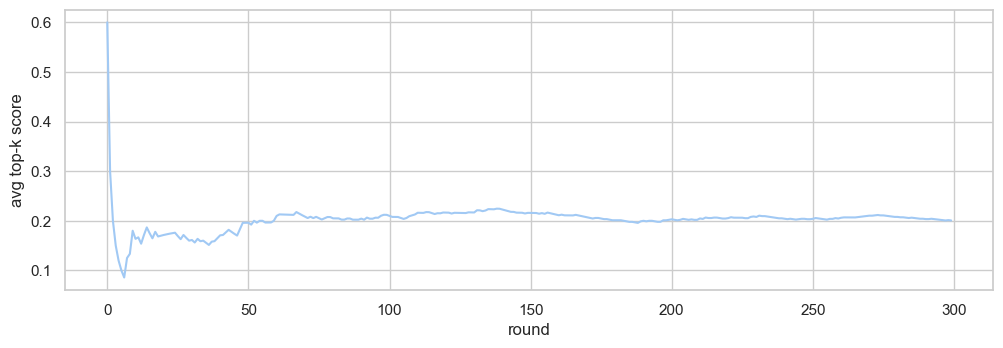

In [39]:
fig, axs = plt.subplots(ncols=1, figsize=CONFIG.PLT_FIG_SIZE)
fig.tight_layout(pad=5.0)

plt_0 = sns.lineplot(
    avg_top_k_score_by_time_list, ax=axs).set(xlabel='round', ylabel='avg top-k score')


#### 5.2. **Evaluation** using **AUC**

In [40]:
avg_auc_score_by_time_list = []
sum_auc_score = 0

for selected_user_id in selected_user_ids:
    selected_user_rating_merged_df = rating_merged_df[rating_merged_df['user_id'] == selected_user_id]
    selected_user_rating_merged_df.reset_index(drop=True, inplace=True)

    selected_anime_id = np.random.choice(selected_user_rating_merged_df['anime_id'].unique(), size=1)[0]

    # print(
    #     f'\nTest by having user_id:{selected_user_id} pick anime_id:{selected_anime_id}'
    # )

    core = ContentBasedFiltering(anime_df)
    core.suggest(n=anime_suggestion_size, picked_anime_id=selected_anime_id)

    ctb_anime_actual_interect_df = core.anime_df[core.anime_df['anime_id'].isin(selected_user_rating_merged_df['anime_id'])].copy()
    ctb_anime_not_interect_df = core.anime_df[~core.anime_df['anime_id'].isin(selected_user_rating_merged_df['anime_id'])].copy()

    auc_score = 0

    n = len(ctb_anime_actual_interect_df) * len(ctb_anime_not_interect_df)

    ctb_anime_actual_interect_df['n_prime'] = ctb_anime_actual_interect_df.apply(lambda x: len(ctb_anime_not_interect_df[x['ranking_score'] > ctb_anime_not_interect_df['ranking_score']]), axis=1)
    ctb_anime_actual_interect_df['n_prime_2'] = ctb_anime_actual_interect_df.apply(lambda x: len(ctb_anime_not_interect_df[x['ranking_score'] == ctb_anime_not_interect_df['ranking_score']]), axis=1)

    n_prime = ctb_anime_actual_interect_df['n_prime'].sum()
    n_prime_2 = ctb_anime_actual_interect_df['n_prime_2'].sum()

    auc_score = (n_prime + (0.5 * n_prime_2)) / n

    # print(
    #     f'auc_score : {auc_score:.4f} (n = {n}, n\' = {n_prime} , n\" = {n_prime_2}) (actual_interect : {len(ctb_anime_actual_interect_df)}, not_interect : {len(ctb_anime_not_interect_df)})'
    # )

    sum_auc_score += auc_score
    avg_auc_score_by_time_list.append(sum_auc_score/float(len(avg_auc_score_by_time_list)+1))

print(f'\n{PRINT_COLOR_CODE.WARNING}avg_auc_score : {PRINT_COLOR_CODE.GREEN}{avg_auc_score_by_time_list[-1]}{PRINT_COLOR_CODE.ENDC}')


avg_auc_score : 0.8187442815139468


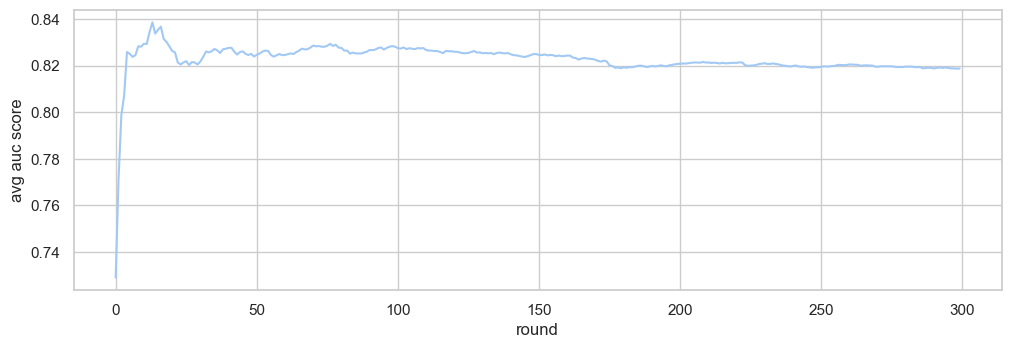

In [41]:
fig, axs = plt.subplots(ncols=1, figsize=CONFIG.PLT_FIG_SIZE)
fig.tight_layout(pad=5.0)

plt_0 = sns.lineplot(avg_auc_score_by_time_list, ax=axs).set(xlabel='round', ylabel='avg auc score')


### **6. Try Suggestion** using **Content-based filtering**

In [42]:
core = ContentBasedFiltering(anime_df)

ctb_suggestion_df = core.suggest(n=10, picked_anime_id=4224, debug=True)

ctb_suggestion_df


(Weight Genre : 0.25) Selected Anime Keywords (genre) : ['comedy', 'romance', 'school', 'slice', 'life']

Picked Anime Name : Toradora!



,anime_id,name,genre,type,episodes,average_rating,members,keywords_genre,ranking_score
671,21405,Bokura wa Minna Kawaisou,"Comedy, Romance, School, Slice of Life",TV,12,7.90,159793,"[comedy, romance, school, slice, life]",0.842500
97,10165,Nichijou,"Comedy, School, Slice of Life",TV,26,8.52,254436,"[comedy, school, slice, life]",0.839000
158,13759,Sakurasou no Pet na Kanojo,"Comedy, Drama, Romance, School, Slice of Life",TV,24,8.40,380375,"[comedy, drama, romance, school, slice, life]",0.838333
926,24913,Bokura wa Minna Kawaisou: Hajimete no,"Comedy, Romance, School, Slice of Life",Special,1,7.76,20622,"[comedy, romance, school, slice, life]",0.832000
1022,23701,Toradora! OVA,"Comedy, Romance, School, Slice of Life",OVA,1,7.72,25154,"[comedy, romance, school, slice, life]",0.829000
190,31715,Working!!!: Lord of the Takanashi,"Comedy, Romance, Slice of Life",Special,1,8.34,31856,"[comedy, romance, slice, life]",0.825500
1248,11235,Amagami SS+ Plus,"Comedy, Romance, School, Slice of Life",TV,13,7.61,73813,"[comedy, romance, school, slice, life]",0.820750
1316,20541,Mikakunin de Shinkoukei,"Comedy, Romance, School, Slice of Life",TV,12,7.59,133385,"[comedy, romance, school, slice, life]",0.819250
270,30015,ReLIFE,"Romance, School, Slice of Life",TV,13,8.24,202249,"[romance, school, slice, life]",0.818000
1348,8676,Amagami SS,"Comedy, Romance, School, Slice of Life",TV,25,7.57,157223,"[comedy, romance, school, slice, life]",0.817750


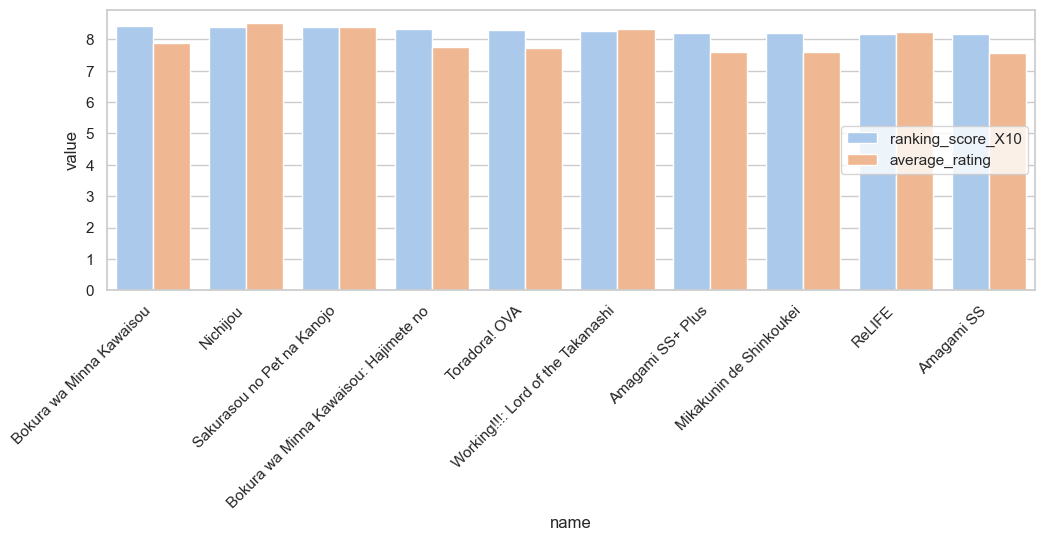

In [43]:
fig, axs = plt.subplots(ncols=1, figsize=CONFIG.PLT_FIG_SIZE)
fig.tight_layout(pad=5.0)

ctb_suggestion_df["ranking_score_X10"] = ctb_suggestion_df["ranking_score"] * 10
tidy = ctb_suggestion_df.melt(id_vars='name', value_vars=['ranking_score_X10', 'average_rating'])

plt_0 = sns.barplot(data=tidy, x='name', y='value', hue="variable", ax=axs)
plt_0.set_xticklabels(plt_0.get_xticklabels(), rotation=45, horizontalalignment='right')
plt_0.legend(loc='right')


## **Recommended System (Collaborative filtering)**

MAE (Mean Absolute Error)
- MAE = 1/n * Σ |y - y^|

Top-K
- Top-K = N/K

AUC
- AUC = (n'+0.5n") / n